# Сборный проект 1

## Введение

### Описание проекта

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Цель проекта

Целью проекта является выявить лидеров среди платформ, определить какие игры принесли наибольшее количество продаж, какие жанры наиболее популярны. Помимо этого необходимо определить портрет пользователя в зависимости от региона. По итогу требуется проверить две гипотезы: 

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Ход решения

1. Открыть файл с данными и изучить общую информацию.
2. Предобработка данных.
4. Проанализировать данные.
5. Составить портрет пользователя каждого региона.
6. Проверить гипотезы.
7. Подвести итоги исследования.

### Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.sample(16)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4236,Scooby-Doo,GBA,2001.0,Platform,0.33,0.12,0.00,0.01,64.0,tbd,E
11441,Tornado Outbreak,X360,2009.0,Action,0.07,0.00,0.00,0.01,62.0,8,E10+
1561,.hack//Infection Part 1,PS2,2002.0,Role-Playing,0.49,0.38,0.26,0.13,75.0,8.5,T
3110,SingStar Pop Hits,PS2,2007.0,Misc,0.00,0.50,0.00,0.15,NaN,NaN,NaN
3838,Madden NFL 07,PS3,2006.0,Sports,0.47,0.00,0.01,0.04,76.0,4.2,E
4844,"Transformers: The Game (XBox 360, PS2, PS3, Wi...",PS3,2007.0,Action,0.32,0.03,0.01,0.04,NaN,NaN,NaN
2368,Resident Evil: Revelations,3DS,2012.0,Action,0.30,0.22,0.30,0.05,82.0,8.5,M
1499,The Witcher 3: Wild Hunt,XOne,2015.0,Role-Playing,0.69,0.50,0.00,0.11,91.0,9.2,M
10894,Medal of Honor: Vanguard,Wii,2007.0,Shooter,0.06,0.03,0.00,0.01,56.0,7,T
12497,Nazotoki Battle Tore! Densetsu no Makyuu o Fuk...,3DS,2014.0,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN


In [3]:
#Переведем названия столбцов на "змеиный язык"

df.columns = df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.duplicated().sum()

0

In [5]:
#явных дубликатов нет, проверим на неявные дубликаты и на аномальные значения

print(df['platform'].unique())
print('***********************')
print('Первый год в выбранном периоде:',df['year_of_release'].min())
print('Последний год в выбранном периоде:',df['year_of_release'].max())
print('***********************')
print(df['genre'].unique())
print('***********************')
print('Наименьшие продажи в Северной Америке:',df['na_sales'].min())
print('Наибольшие продажи в Северной Америке::',df['na_sales'].max())
print('***********************')
print('Наименьшие продажи в Европе:',df['eu_sales'].min())
print('Наибольшие продажи в Европе:',df['eu_sales'].max())
print('***********************')
print('Наименьшие продажи в Японии:',df['jp_sales'].min())
print('Наибольшие продажи в Японии:',df['jp_sales'].max())
print('***********************')
print('Наименьшие продажи в остальных странах:',df['other_sales'].min())
print('Наибольшие продажи в остальных странах:',df['other_sales'].max())
print('***********************')
print('Наименьшая оценка критиков:',df['critic_score'].min())
print('Наибольшая оценка критиков:',df['critic_score'].max())
print('***********************')
#print('Наименьшая оценка пользователей:',df['user_score'].min())
#print('Наибольшая оценка пользователей:',df['user_score'].max())
print(df['user_score'].unique())
print('***********************')
print(df['rating'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
***********************
Первый год в выбранном периоде: 1980.0
Последний год в выбранном периоде: 2016.0
***********************
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
***********************
Наименьшие продажи в Северной Америке: 0.0
Наибольшие продажи в Северной Америке:: 41.36
***********************
Наименьшие продажи в Европе: 0.0
Наибольшие продажи в Европе: 28.96
***********************
Наименьшие продажи в Японии: 0.0
Наибольшие продажи в Японии: 10.22
***********************
Наименьшие продажи в остальных странах: 0.0
Наибольшие продажи в остальных странах: 10.57
***********************
Наименьшая оценка критиков: 13.0
Наибольшая оценка критиков: 98.0
***********************
['8' nan '8.3' '8.5' '6.6'

Неявных дубликато в столбцах platform, genre, critic_score и rating нет.
Аномалий в остальных столбцах не выявлено.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

In [7]:
#удалим 2 строки с проусками в столбце 'name', предварительно изучив их.

display(df[df['name'].isna()])
df = df.dropna(subset = ['name']).reset_index(drop=True)
df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Из 16715 позиций у двух позиций отсутствует название игры, жанр, оценка критиков и пользователей, а также рейтинг. Считаю, что мы без зазрения совести, можем удалить эти две строки.

In [8]:
#Изучим пропуски в столбце "year_of_release"
display(df[(df['year_of_release'].isna())&(df['name'].duplicated())])
display(df.query('name == "Call of Duty 3"'))
game_without_year = df[(df['year_of_release'].isna())&(df['name'].duplicated())]['name'].unique()
df.query('name in @game_without_year and year_of_release.notna()')['name'].value_counts()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.0,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.0,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1130,Call of Duty: Black Ops,PC,NaN,Shooter,0.58,0.81,0.0,0.23,81.0,5.2,M
...,...,...,...,...,...,...,...,...,...,...,...
16327,Brothers in Arms: Furious 4,X360,NaN,Shooter,0.01,0.00,0.0,0.00,NaN,NaN,M
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.0,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.0,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.0,0.00,59.0,6.7,M


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
557,Call of Duty 3,X360,2006.0,Shooter,1.49,0.92,0.02,0.27,82.0,6.5,T
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
1254,Call of Duty 3,PS3,2006.0,Shooter,0.60,0.62,0.03,0.26,80.0,6.9,T
1914,Call of Duty 3,PS2,2006.0,Shooter,0.89,0.03,0.00,0.15,82.0,7.4,T


Madden NFL 07                                  8
LEGO Indiana Jones: The Original Adventures    6
Madden NFL 06                                  6
LEGO Batman: The Videogame                     5
Tiger Woods PGA Tour 07                        5
                                              ..
AKB1/48: Idol to Guam de Koishitara...         1
World of Tanks                                 1
Bejeweled 3                                    1
PDC World Championship Darts 2008              1
Danganronpa: Trigger Happy Havoc               1
Name: name, Length: 75, dtype: int64

По 75 играм мы можем заменить пропуски годами из других строк по соответстующим играм.

In [9]:
year_group = df.groupby('name')['year_of_release'].transform('median')
df.loc[df['year_of_release'].isna(),'year_of_release'] = year_group
display(df.query('name == "Call of Duty 3"'))
df.info()
print('')
print('Процент пропусков в столбце года:',len(df[df['year_of_release'].isna()])/len(df)*100, '%')
print('')
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
557,Call of Duty 3,X360,2006.0,Shooter,1.49,0.92,0.02,0.27,82.0,6.5,T
718,Call of Duty 3,Wii,2006.0,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
1254,Call of Duty 3,PS3,2006.0,Shooter,0.60,0.62,0.03,0.26,80.0,6.9,T
1914,Call of Duty 3,PS2,2006.0,Shooter,0.89,0.03,0.00,0.15,82.0,7.4,T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Процент пропусков в столбце года: 0.8735714713097589 %

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           -------

Мы заменили пропуски на соответствующие года по данным играм. Процент незаполненных значений составил меньше 1%. Мы можем беспрепятственно удалить эти пропуски. Теперь у нас не осталось пропусков и можно поменять тип данных на целые числа.

In [10]:
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


По аналогии заменим пропущенные значения в столбце critic_score и user_score. Но заменять будем на средние значения по одной игре на разных платформах.

In [11]:
critic_group = df.groupby('name')['critic_score'].transform('mean')
df.loc[df['critic_score'].isna(),'critic_score'] = critic_group
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


"To be discussed" пишут, когда игра ещё не вышла, по этому оценок пользователей пока нет. Но в нашей таблице игры разных годов имеют такое значение. Соответственно можем считать, что данных по пользовательской оценки нет. Заменим их на пропуски.

In [12]:
display(df[df['user_score'] == 'tbd'])
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan
df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,42.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
519,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
643,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
714,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16547,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16549,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16550,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16556,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     9035 non-null   float64
 9   user_score       7540 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [13]:
#Поменяем тип на вещественные у значений в столбце user_score при условии, что данное значение не равно NaN
df['user_score'] = pd.to_numeric(df.loc[df['user_score'].notna(),'user_score'])

In [14]:
user_group = df.groupby('name')['user_score'].transform('mean')
df.loc[df['user_score'].isna(),'user_score'] = user_group
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     9035 non-null   float64
 9   user_score       8639 non-null   float64
 10  rating           9868 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Заменяем пропуски в столбце rating. Если на других платформах есть рейтинг игры, то этим значением мы заменим пропуски, если значений нет, то оставим пропуски.

In [15]:
rating_group = df[df['rating'].notna()].groupby('name')['rating'].first()

def change_rating(row):
    if pd.isna(row['rating']):
        try:
            return rating_group.loc[row['name']]
        except:
            return row['rating']
    return row['rating']

df['rating'] = df.apply(change_rating, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     9035 non-null   float64
 9   user_score       8639 non-null   float64
 10  rating           10305 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Удалять пропуски в столбцах critic_score, user_score, rating не будем, так как пропусков больше 30%. Посчитаем общие продажи по всем регионам и этап предопработки данных можно считать закрытым.

In [16]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Я думаю, пропуски в названии игр 1993 года связан с тем, что возможно это стандартные игры платформы, поэтому нет не имени, ни жанра. Интереснее вопрос почему отсутствуют данные, когда вышла игра, если на других платформах есть дата выхода. Думаю это либо техническая ошибка, либо человеческий фактор: зафиксировали количество продаж, название платформы и все. Отсутствие оценок пользователей и критиков, а также отсутствие рейтинг связана либо с небольшой популярностью игры и на нее не обращает внимание мировое пространство, либо данные не были перенесен, как в случае годом выхода игры.

## Анализ данных

#### 1. Количество вышедших игр по годам:

<AxesSubplot:xlabel='year_of_release'>

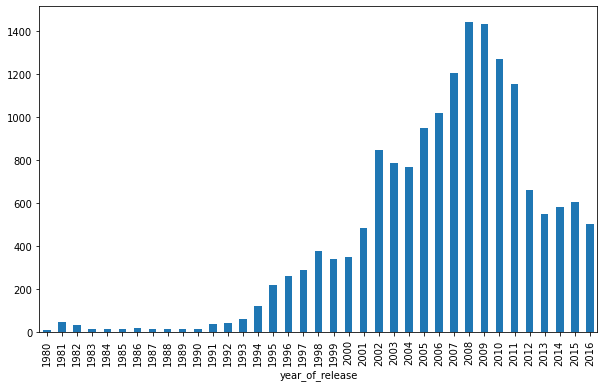

In [17]:
df.groupby('year_of_release')['genre'].count().plot(kind='bar',figsize=(10,6))

#### 2. Изменение продаж по платформам

Определим топ-6 платформ по продажам за все года:

In [18]:
top_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(10)
top_platform

platform
PS2     1247.16
X360     966.61
PS3      935.19
Wii      903.31
DS       804.28
PS       727.58
PS4      314.14
GBA      313.73
PSP      293.57
PC       258.86
Name: total_sales, dtype: float64

Распределение продаж по годам для топ-10 платформ:

In [19]:
top_platform_list = top_platform.index.tolist()
df_top_platform = df.query('platform in @top_platform_list').\
pivot_table(index = 'year_of_release', columns = 'platform', 
            values = 'total_sales', aggfunc = 'sum')
df_top_platform

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,0.02,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN


PS2


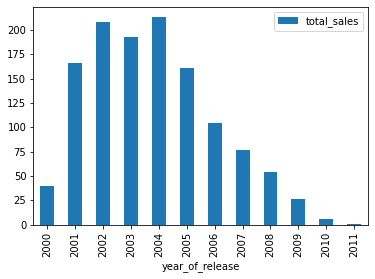

X360


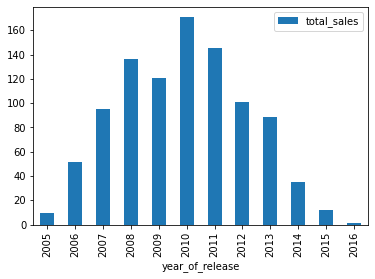

PS3


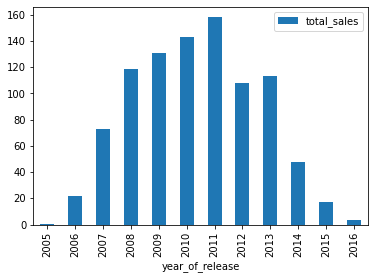

Wii


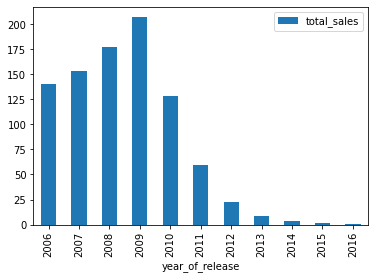

DS


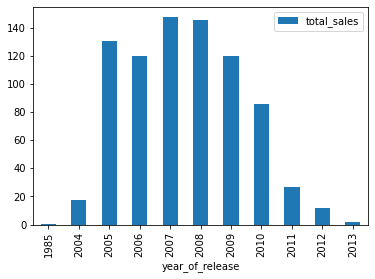

PS


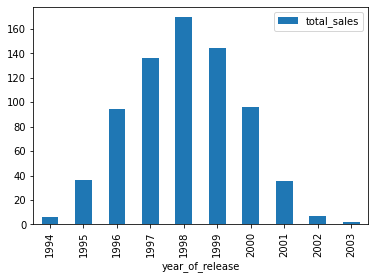

PS4


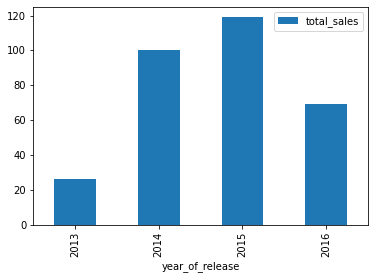

GBA


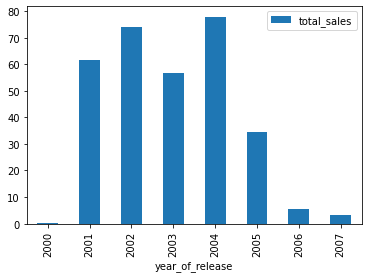

PSP


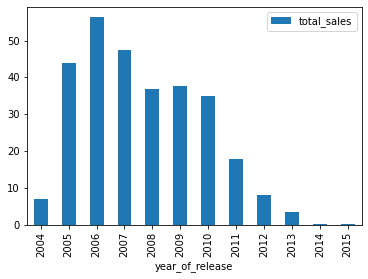

PC


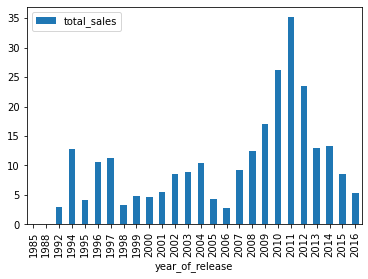

In [20]:
for platform in top_platform.index:
    print(platform)
    (df
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

Из первого пункта анализа мы увидели рост количества игр к 2008 году и спад после него. Из второго пункта наглядно показан срок "жизни" топ платформ, которые составляет в среднем 10 лет. 

Но с учетом динамично меняющейся индустрии в компьютерных играх, **актуальный период** возьмем 3 года с 2013 по2015 год.

#### Актуальный период без учета предыдущих лет

In [21]:
df_top_platform_actual = (
    df.query('2013<= year_of_release <= 2015').
    pivot_table(index = 'year_of_release', columns = 'platform', 
                values = 'total_sales', aggfunc = 'sum').sum().
    sort_values(ascending = False).head(10))
display(df_top_platform_actual)
top_platform_actual_list = df_top_platform_actual.index.tolist()
df_act = df.query('2013<= year_of_release <= 2015')

platform
PS4     244.89
PS3     177.83
X360    135.28
XOne    133.17
3DS     128.11
WiiU     60.03
PC       34.81
PSV      28.74
Wii      13.48
PSP       3.74
dtype: float64

Изменив период, мы получили новый топ платформ по продажам за актуальный период. Первые три места заняли X360, PS3, PS4.

#### Потенциально прибыльные платформы

Text(0, 0.5, 'Количество продаж')

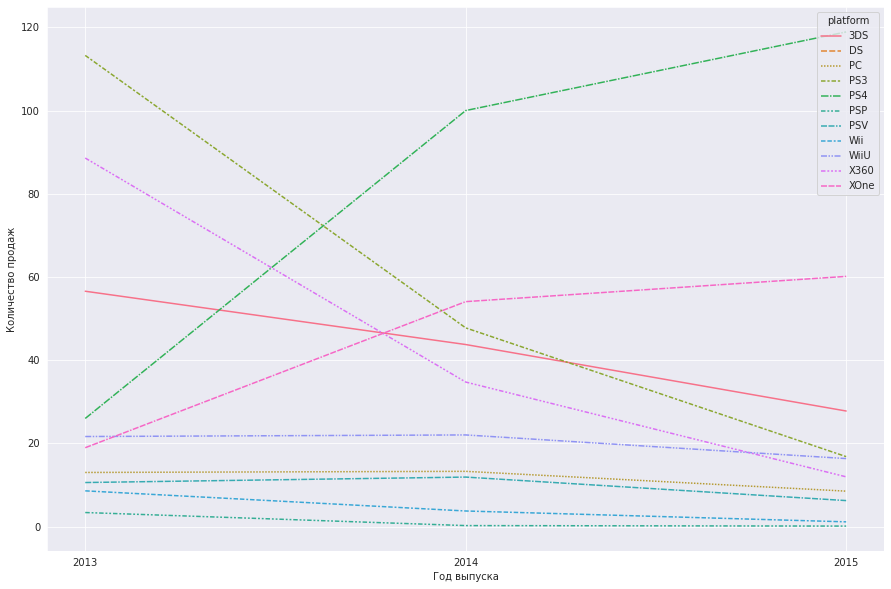

In [23]:
sales_on_platform_actual = (
    df_act.pivot_table(index='year_of_release', 
                       columns ='platform', 
                       values='total_sales', 
                       aggfunc='sum')
)
plt.figure(figsize=(15,10))
sns.lineplot(data=sales_on_platform_actual).locator_params(integer=True)
sns.set_style('darkgrid')
plt.xlabel("Год выпуска")
plt.ylabel("Количество продаж")

На графике мы видим, что платформы PS4 и XOne растут в количестве продаж. В свою очередь 3DS, PS3, X360 стремительно падают, в том числе потому что на смену им пришли PS4, XOne. Остальные платформы стабильны на своем низком уровне продаж до 20.

In [ ]:
sales_on_top_platform_actual =df_act.query('platform in @top_platform_actual_list')
#sales_on_top_platform_actual.boxplot(column='total_sales', by='platform', figsize=(15,10), grid=True)
plt.figure(figsize=(15,10))
sns.boxplot(data=sales_on_top_platform_actual, x="platform", y="total_sales")
plt.ylim(0,2.5)
plt.xlabel("Топ платформ")
plt.ylabel("Количество продаж")

Из графика видно что в актуальном периоде на последних места продажи игр у платформ PC, PSP, PSV, 3DS, где 75% проданных копий меньше 0,25. Платформы WiiU и PS3 находятся на закате своего "жизненного" цикла, у них объем продаж большинства игр чуть больше 0,5. У патформ X360 и Wii есть одно общее: 75% продаж около 0.9, при медиана и нижний квартель у Х360 выше. Аналогичное сходство у приемников этих двух платформ: XOne и PS4. И если сравнивать с предшественниками этих двух платформ, то медиана количества продаж поднялась, а 75% количества проданных игр превысило 1,1. Данный факт также указывает о перспективности данных платформ.

#### Диаграмма рассеяния и корреляция для PS3

In [ ]:
(
    sales_on_top_platform_actual[sales_on_top_platform_actual['platform'] == 'PS3'].
    plot(x='total_sales', y='user_score',kind='scatter', alpha = 0.4, figsize=(15,10))
)
(
    sales_on_top_platform_actual[sales_on_top_platform_actual['platform'] == 'PS3'].
    plot(x='total_sales', y='critic_score',kind='scatter', alpha = 0.4, figsize=(15,10))
)
correlation = (
    sales_on_top_platform_actual[sales_on_top_platform_actual['platform'] == 'PS3']
    [['user_score','critic_score','total_sales']].corr()
)
print(correlation)

Судя по графикам и корреляции, можно сделать вывод, что взаимосвязь между отзывами критиков и количеством продаж есть, коэффициент корреляции = 0.4. Связь между отзывами пользователей и объемом продаже либо отсутствует, либо не линейная и составялет 0.13. 

#### Диаграмма рассеяния и корреляция для остальных платформ

In [ ]:
for pf in top_platform_actual_list:
    x = sales_on_top_platform_actual.query('platform == @pf')\
    .plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3, figsize=(15,15))\
    .set(title=f'Влияние пользовательских оценок на продажи игр на {pf}',xlabel='Оценка пользователя', ylabel='Продажи');
    y =  sales_on_top_platform_actual.query('platform == @pf')\
    .plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3, figsize=(15,15))\
    .set(title=f'Влияние оценок критиков на продажи игр на {pf}',xlabel='Оценка критика', ylabel='Продажи');
    plt.show()
    correlation =  sales_on_top_platform_actual.query('platform == @pf')[['user_score','critic_score','total_sales']].corr()
    display(correlation)

Есть определенные сходства с графиками и коэф. корреляции с PS3 у отсальных платформ. У платформ X360, PS2, PS4, Xone схожая зависимость количества продаж от отзывов критиков и количества продаж от оценок пользователей. Однако есть платформы, у которых связь между продажами и отзывами критиков намного меньше: PSP = 0.28, Wii = 0.16, DS = 0.23, 3DS = 0.33, PC = 0.28. Думаю ответ кроется в популярности этих платформ, и как следствие внимание критиков к ним. Взаимосвязь количества продаж у этих платформ с оценками пользователей стремится к нулю, это является общим для всех платформ. Однако есть платформы PC, Xone где эта связь отрицательная. Причина этого кроется в "шумах". 


#### Распределение по жанрам

In [ ]:
sales_genre = sales_on_top_platform_actual.groupby('genre').agg({'total_sales':['sum','count','mean','median']}).reset_index()
sales_genre.columns = [tup[1] if tup[1] else tup[0] for tup in sales_genre.columns]
display(sales_genre.sort_values(by = 'sum',ascending = False))

Самыми прибыльными жанрами являются Sports, Shooter, Platform, так как медианное значение у них наибольшее. По количество купленных копий игры лидирует Shooters c большим отрывом. На втором месте игры в жанре Sports, на третьем - Platform. Подытожим, можно сказать, что наиболее перспективные направления - это Shooters и Sports.

# Портрет пользователя

In [ ]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

print('Popular genre in different regions')  
for value in regions:
    group_regions = df_act.pivot_table(index = 'genre', values = value, aggfunc = 'sum').sort_values(by = value, ascending=False).reset_index()
    group_regions['persentage'] = round((group_regions[value] / group_regions[value].sum()) * 100, 1)
    group_regions['group_name'] = group_regions['genre'].where(group_regions['persentage'] > 7, 'Другие')
    group_regions.pivot_table(index = 'group_name', values = 'persentage', aggfunc = 'sum').plot(kind='pie', x = 'group_name', y = 'persentage', label = '', legend = False, title = value, autopct = '%1.0f%%', figsize=(4, 4));
    plt.show()

In [ ]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

print('Popular platform in different regions')  
for value in regions:
    group_regions = df_act.pivot_table(index = 'platform', values = value, aggfunc = 'sum').sort_values(by = value, ascending=False).reset_index()
    group_regions['persentage'] = round((group_regions[value] / group_regions[value].sum()) * 100, 1)
    group_regions['group_name'] = group_regions['platform'].where(group_regions['persentage'] > 7, 'Другие')
    group_regions.pivot_table(index = 'group_name', values = 'persentage', aggfunc = 'sum').plot(kind='pie', x = 'group_name', y = 'persentage', label = '', legend = False, title = value, autopct = '%1.0f%%', figsize=(4, 4));
    plt.show()

In [ ]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

df_act['rating'] = df_act['rating'].fillna('Не определён')

print('Popular rating in different regions')  
for value in regions:
    group_regions = df_act.pivot_table(index = 'rating', values = value, aggfunc = 'sum').sort_values(by = value, ascending=False).reset_index()
    group_regions['persentage'] = round((group_regions[value] / group_regions[value].sum()) * 100, 1)
    group_regions.pivot_table(index = 'rating', values = 'persentage', aggfunc = 'sum').plot(kind='pie',x = 'rating', y = 'persentage', label = '', legend = False, title = value, autopct = '%1.0f%%', figsize=(4, 4))
    plt.show()

**I. Портрет пользователя из Северной Америки**
Наиболее популярными жанрами являются Action (30%), Shooter (24%), Sports (15%). Наибольшее количество людей играют на PS4 - 22%, X360 - 21%, XOne - 20%.По рейтингу 40% выбирают "для взрослых", 19% - "для всех" и 17%, где рейтинг не определён.

**II. Портрет пользователя из Европы**
Наиболее популярными жанрами являются Action (32%), Sports (14%), Shooter (21%). Наибольшее количество людей играют на PS4 - 32%; PS3 - 20%; Xone, X360 - 12%. По рейтингу 41% выбирают "для взрослых", 21% - "для всех" и 16%, где рейтинг не определён.

**III. Портрет пользователя из Японии**
Наиболее популярными жанрами являются Role-Playing (36%), Action (27%), Другие (36%). Наибольшее количество людей играют на 3DS - 49%, PS3 - 18%, PSV - 12%. По рейтингу 17% выбирают "для подростков", 12% - "для всех" и 55%, где рейтинг не определён.

## Проверка гипотез и пояснение

### Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
Нулевая гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC равны". Альтернативная гипотеза - они различаются. Уровень статистической значимости = 0.05. Будем использовать гипотезу о равенстве средних двух генеральных совокупностей

In [ ]:
xone_user_score = df.query('platform == "XOne" & 2005<= year_of_release <= 2015')['user_score'].dropna()
pc_user_score = df.query('platform == "PC" & 2005<= year_of_release <= 2015')['user_score'].dropna()

alpha_1 = .05
results_1 = (st.ttest_ind(
    xone_user_score,
    pc_user_score)
)

print('р-значение =', results_1.pvalue)
if (results_1.pvalue < alpha_1):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Отвергаем нулевую гипотезу "О равенстве средних пользовательских рейтингах платформ Xbox One и PC". 

### Гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные"
Нулевая гипотеза "Средние пользовательские рейтинги жанров Action и Sports равны". Альтернативная гипотеза - они различаются. Уровень статистической значимости = 0.05. Будем использовать гипотезу о равенстве средних двух генеральных совокупностей

In [ ]:
action_user_score = df.query('genre == "Action" & 2005<= year_of_release <= 2015')['user_score'].dropna()
sports_user_score = df.query('genre == "Sports" & 2005<= year_of_release <= 2015')['user_score'].dropna()

alpha_2 = .05
results_2 = (st.ttest_ind(
    action_user_score,
    sports_user_score)
)

print('р-значение =', results_2.pvalue)
if (results_1.pvalue < alpha_2):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Отвергаем нулевую гипотезу "О равенстве средних пользовательских рейтингах жанров Action и Sports". Соответственно альтернативную гипотезу, о том, что они равные, не отвергаем.

# Общий вывод

Данный проект мы начали с описательной части, где расписали значение столбцов, какая перед нами стоит задач и какие данные у нас есть. Затем мы перешли к обработке данных, где меняли регистр названия столбцов, заменяли пропуски или удаляли, а также проверяли на дубликаты. 

Следующим шагом была анализ очищенных данных. На данном шаге мы выяснили, срок "жизни" платформы, пик продаж игр, что позволила нам сократить период изучаемых данных до 3 лет. Затем выявили лидеров на этой декаде (PS3 и X360), а также потенциально успешные платформы (PS4 и XOne). Выяснили, что взаимосвязь количества продаж и пользовательских оценок нелинейная, а связь между отзывами критиков и продажачи наблюдается. После чего, мы определили портреты игроков из трех регионов, где выяснили сходство игроков из Северной Америки и Европы в жанрах, рейтингах. И огромная разница с игроками из Японии, которые предпочитают платформы 3DS и DS, жанр ролевых игр и чаще всего играют в игр с неопределенным рейтингом. 

В конце данного проекта мы проверили две гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "Средние пользовательские рейтинги жанров Action и Sports разные". Первую гипотезу мы отвергли, а вторую - нет.

**Рекомендации**

Важно понимать, кто является нашей целевой аудиторией. Если это Северная Америка, то акцент надо сделать на новую платформу Xone, игры с жанром Aсtion, Sports, Shooter и рейтингом "для взрослых". Если это Европа, то платформа - PS4, игры жанра - Aсtion, Sports, Shooter и ретингом "для взрослых". Если это Япония, то определенно платформа 3DS, жанр - Role-Playing или Action. По последним сложно сказать, какой они предпочитают рейтинг, необходимы дополнительные данные по этмоу региону. Если целью является создать мировую игру, то идеальный комбинация будет - PS4, Shooter, 'для взрослых'. Не стоит обделять вниманием критиков, так как их положительные оценки добавят балов к росту игры.